In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-rootproblem-bessel)

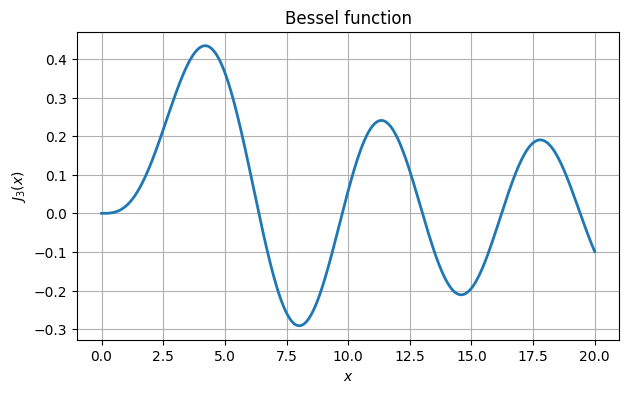

In [2]:
import scipy.special as special
def J3(x):
    return special.jv(3.0, x)

xx = linspace(0, 20, 500)
fig, ax = subplots()
ax.plot(xx, J3(xx))
ax.grid()
xlabel("$x$"), ylabel("$J_3(x)$")
title("Bessel function");

From the graph we see roots near 6, 10, 13, 16, and 19. We use `root_scalar` from the `scipy.optimize` package to find these roots accurately.

In [3]:
from scipy.optimize import root_scalar

omega = []
for guess in [6.0, 10.0, 13.0, 16.0, 19.0]:
    s = root_scalar(J3, bracket=[guess - 0.5, guess + 0.5]).root
    omega.append(s)

results = PrettyTable()
results.add_column("root estimate", omega)
results.add_column("function value", [J3(ω) for ω in omega])
print(results)

+--------------------+-------------------------+
|   root estimate    |      function value     |
+--------------------+-------------------------+
| 6.380161895923983  |  2.5877058405892666e-16 |
| 9.761023129981195  | -1.1824718824668837e-13 |
| 13.015200721698434 |  -1.135864957485476e-16 |
| 16.223466160318758 |  -1.898385896228919e-15 |
| 19.40941522643501  |  7.862906169587308e-16  |
+--------------------+-------------------------+


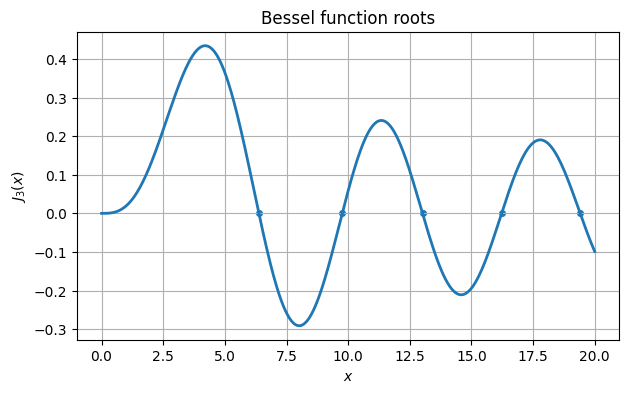

In [4]:
ax.scatter(omega, J3(omega))
ax.set_title("Bessel function roots")
fig

If instead we seek values at which $J_3(x)=0.2$, then we must find roots of the function $J_3(x)-0.2$.

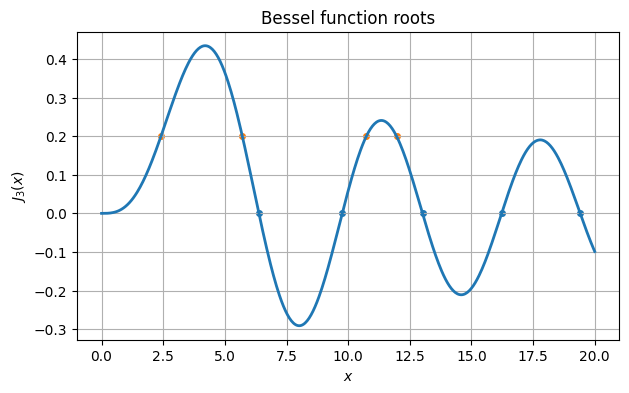

In [5]:
omega = []
for guess in [3., 6., 10., 13.]:
    f = lambda x: J3(x) - 0.2
    s = root_scalar(f, x0=guess).root
    omega.append(s)

ax.scatter(omega, J3(omega))
fig